In [1]:
import pandas as pd
import numpy as np
import pickle

### Read everything in (so far all months in 2016 and 2017 and Q1 2018)

In [2]:
months = np.arange(1,13)
months18 = np.arange(1,4)

In [3]:
aotp_data = pd.DataFrame()
for mo in months:
    path = 'AOTPData/On_Time_On_Time_Performance_2016_' + str(mo) + '.csv'
    tmp = pd.read_csv(path)    
    aotp_data = pd.concat([aotp_data, tmp], axis=0, ignore_index=True)
    del(tmp)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaco

In [4]:
for mo in months:
    path = 'AOTPData/On_Time_On_Time_Performance_2017_' + str(mo) + '.csv'
    tmp = pd.read_csv(path)
    aotp_data = pd.concat([aotp_data, tmp], axis=0, ignore_index=True)
    del(tmp)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
for mo in months18:
    path = 'AOTPData/On_Time_On_Time_Performance_2018_' + str(mo) + '.csv'
    tmp = pd.read_csv(path)
    aotp_data = pd.concat([aotp_data, tmp], axis=0, ignore_index=True)
    del(tmp)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Make separate dataframes for each given year (this seems redundant but will be useful later)

In [6]:
aotp_16 = aotp_data[aotp_data['Year'] == 2016]
aotp_17 = aotp_data[aotp_data['Year'] == 2017]
aotp_18 = aotp_data[aotp_data['Year'] == 2018]

### Now take only EWR/JFK/LGA originating flights

In [7]:
aotp_data.shape

(12995149, 110)

In [8]:
nyc_airports = ['EWR', 'JFK', 'LGA']
#top20connect = ['LAS', 'ORD', 'DEN', 'SAN', 'PHX', 'DFW', 'CLT', 'MSP', 'SFO', 'MDW', 'DAL', 'ATL', 'PHL', 'DTW', 'SLC', 'IAH', 'SNA', 'BOS', 'STL', 'BWI']

In [9]:
aotp_nyc = aotp_data[aotp_data['Origin'].isin(nyc_airports)]

In [10]:
aotp_nyc.shape

(719502, 110)

### Keep only flights not cancelled nor diverted

In [11]:
aotp_nyc = aotp_nyc[aotp_nyc['Diverted'] == 0]

In [12]:
aotp_nyc = aotp_nyc[aotp_nyc['Cancelled'] == 0]

In [13]:
aotp_nyc.shape

(696516, 110)

In [14]:
aotp_nyc.columns.values

array(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraft

### Separate 2016-17 data from 2018

In [15]:
aotp_nyc1617 = aotp_nyc[aotp_nyc['Year'] < 2018].reset_index()
aotp_nyc18 = aotp_nyc[aotp_nyc['Year'] == 2018].reset_index()

### Do we need to keep all carriers (airlines)?

In [16]:
np.cumsum(aotp_nyc1617['UniqueCarrier'].value_counts(normalize=True))

UA    0.202369
DL    0.399894
B6    0.589313
AA    0.752348
EV    0.885327
WN    0.941502
VX    0.966822
NK    0.984599
AS    0.990434
OO    0.995625
F9    0.998847
HA    1.000000
Name: UniqueCarrier, dtype: float64

Almost 97% for the first 7 listed -- need to combine EV (ExpressJet) and OO (SkyWest). These are the carriers to keep.

In [17]:
keep_carr = list(aotp_nyc1617['UniqueCarrier'].value_counts(normalize=True).index[:7])
keep_carr.append('OO')

Here combine EV and OO

In [18]:
aotp_nyc1617.loc[aotp_nyc1617['UniqueCarrier'] == 'OO', 'UniqueCarrier'] = 'EV'
aotp_nyc18.loc[aotp_nyc18['UniqueCarrier'] == 'OO', 'UniqueCarrier'] = 'EV'

In [19]:
aotp_nyc1617.loc[aotp_nyc1617['Carrier'] == 'OO', 'Carrier'] = 'EV'
aotp_nyc18.loc[aotp_nyc18['Carrier'] == 'OO', 'Carrier'] = 'EV'

### What about destination airports?

In [20]:
import bisect
dest_cu = np.cumsum(aotp_nyc1617['Dest'].value_counts(normalize=True))
idx = bisect.bisect(dest_cu, .95)
dest_to_keep = dest_cu[:idx]
dest_to_keep = list(dest_to_keep.index)

61 destination airports cover 95% of the flights.

In [21]:
len(dest_to_keep)

61

In [22]:
dest_to_keep

['LAX',
 'ATL',
 'MCO',
 'BOS',
 'ORD',
 'FLL',
 'SFO',
 'MIA',
 'CLT',
 'DEN',
 'PBI',
 'DFW',
 'TPA',
 'LAS',
 'IAH',
 'DTW',
 'SJU',
 'DCA',
 'PHX',
 'MSP',
 'SEA',
 'CLE',
 'MDW',
 'BUF',
 'RSW',
 'SAN',
 'STL',
 'AUS',
 'CHS',
 'RDU',
 'MSY',
 'PWM',
 'BNA',
 'DAL',
 'SLC',
 'RIC',
 'BTV',
 'ROC',
 'MKE',
 'JAX',
 'SAV',
 'SYR',
 'GSO',
 'PDX',
 'IND',
 'IAD',
 'ORF',
 'HOU',
 'MYR',
 'CMH',
 'CVG',
 'GRR',
 'PIT',
 'SNA',
 'GSP',
 'BQN',
 'HNL',
 'PHL',
 'SDF',
 'MEM',
 'STT']

I want to limit this analysis to the continental US at the moment, but there are a few airports which are not in the continental US -- HNL, SJU, STT, BQN. I'll remove these below.

In [23]:
dest_to_keep.remove('SJU')
dest_to_keep.remove('BQN')
dest_to_keep.remove('STT')
dest_to_keep.remove('HNL')

In [24]:
len(dest_to_keep)

57

Now keep only the carriers and destination airports we have specified to keep.

In [25]:
aotp_nyc1617_new = aotp_nyc1617[aotp_nyc1617['Dest'].isin(dest_to_keep)]
aotp_nyc18_new = aotp_nyc18[aotp_nyc18['Dest'].isin(dest_to_keep)]

In [26]:
aotp_nyc1617_new = aotp_nyc1617_new[aotp_nyc1617_new['UniqueCarrier'].isin(keep_carr)]
aotp_nyc18_new = aotp_nyc18_new[aotp_nyc18_new['UniqueCarrier'].isin(keep_carr)]

In [27]:
aotp_nyc1617_new.shape

(536241, 111)

In [28]:
aotp_nyc18_new.shape

(61348, 111)

### Keep specific hours for scheduled departures and arrivals

In [29]:
aotp_nyc1617_new = aotp_nyc1617_new[(aotp_nyc1617_new['CRSDepTime'] >= 600) & (aotp_nyc1617_new['CRSDepTime'] < 2100)]
aotp_nyc18_new = aotp_nyc18_new[(aotp_nyc18_new['CRSDepTime'] >= 600) & (aotp_nyc18_new['CRSDepTime'] < 2100)]

In [30]:
aotp_nyc1617_new = aotp_nyc1617_new[(aotp_nyc1617_new['CRSArrTime'] >= 800) & (aotp_nyc1617_new['CRSArrTime'] < 2400)]
aotp_nyc18_new = aotp_nyc18_new[(aotp_nyc18_new['CRSArrTime'] >= 800) & (aotp_nyc18_new['CRSArrTime'] < 2400)]

In [31]:
print(aotp_nyc1617_new.shape)
print(aotp_nyc18_new.shape)

(495512, 111)
(56766, 111)


In [37]:
np.mean(aotp_nyc1617['ArrDel15'])

0.2293625730700552

In [38]:
np.mean(aotp_nyc18['ArrDel15'])

0.20387553756640525

### Some basic EDA for the Response (ArrDel15)

In [32]:
aotp_nyc_new = pd.concat([aotp_nyc1617_new, aotp_nyc18_new], axis=0)

In [33]:
with open('aotp_nyc_new.pkl', 'wb') as pckl3:
    pickle.dump(aotp_nyc_new, pckl3)

In [33]:
aotp_nyc_new[(aotp_nyc_new['Year']==2016)&(aotp_nyc_new['ArrDel15']==1)].shape

(52823, 111)

In [34]:
aotp_nyc_new[(aotp_nyc_new['Year']==2017)&(aotp_nyc_new['ArrDel15']==1)].shape

(57180, 111)

In [35]:
aotp_nyc_new[(aotp_nyc_new['Year']==2018)&(aotp_nyc_new['ArrDel15']==1)].shape

(11018, 111)

#### By origin airport

In [37]:
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('fivethirtyeight')

In [38]:
group_orig = aotp_nyc_new.groupby(['Year', 'Origin'])[['ArrDel15']].mean()
group_orig

ArrDel15
Year Origin          
2016 EWR     0.211317
     JFK     0.205906
     LGA     0.209958
2017 EWR     0.251536
     JFK     0.235877
     LGA     0.215852
2018 EWR     0.204105
     JFK     0.195780
     LGA     0.181629

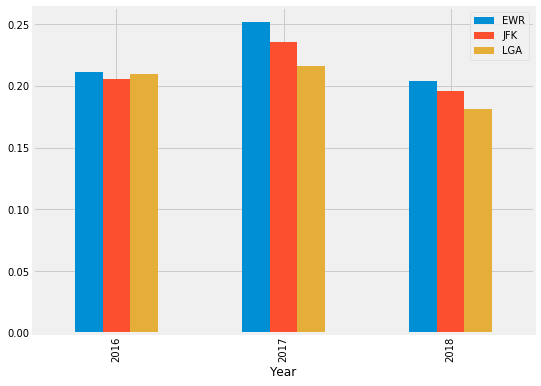

In [39]:
group_orig.unstack().plot.bar(figsize=(8,6))
plt.legend(['EWR', 'JFK', 'LGA'])

#### By destination airport

In [40]:
pd.set_option('display.max_columns', None)
group_dest = aotp_nyc_new.groupby(['Year', 'Dest'])[['ArrDel15']].mean()
group_dest.unstack()

ArrDel15                                                              \
Dest       ATL       AUS       BNA       BOS       BTV       BUF       CHS   
Year                                                                         
2016  0.172658  0.189565  0.200873  0.212620  0.174044  0.201771  0.197237   
2017  0.189804  0.218339  0.220537  0.261794  0.200850  0.232250  0.199816   
2018  0.137687  0.145714  0.181586  0.215652  0.237624  0.289926  0.188144   

                                                                            \
Dest       CLE       CLT       CMH       CVG       DAL       DCA       DEN   
Year                                                                         
2016  0.222691  0.178669  0.210179  0.164493  0.208573  0.255774  0.180438   
2017  0.258818  0.199555  0.205208  0.259080  0.198340  0.322229  0.217435   
2018  0.259422  0.176800  0.170984  0.225806  0.180095  0.272189  0.173792   

                                                                            \
Dest       DFW       DTW       FLL       GRR       GSO       GSP       HOU   
Year                                                                         
2016  0.197823  0.165951  0.256649  0.236641  0.227538  0.259980  0.194997   
2017  0.188848  0.181771  0.247728  0.349306  0.299140  0.185263  0.203451   
2018  0.136334  0.166078  0.203893  0.197531  0.350877  0.171429  0.221154   

                                                                            \
Dest       IAD       IAH       IND       JAX       LAS       LAX       MCO   
Year                                                                         
2016  0.237559  0.200641  0.204506  0.216216  0.184940  0.200440  0.224837   
2017  0.269991  0.192778  0.263753  0.267785  0.223191  0.239546  0.242743   
2018  0.223022  0.165759  0.222591  0.228814  0.179369  0.177914  0.214627   

                                                                            \
Dest       MDW       MEM       MIA       MKE       MSP       MSY       MYR   
Year                                                                         
2016  0.228836  0.196944  0.205918  0.208545  0.173100  0.171348  0.137184   
2017  0.287185  0.250000  0.210093  0.314347  0.189631  0.210805  0.173375   
2018  0.297778  0.281022  0.151159  0.262931  0.117135  0.157973  0.117647   

                                                                            \
Dest       ORD       ORF       PBI       PDX       PHL       PHX       PIT   
Year                                                                         
2016  0.223348  0.209474  0.242186  0.286054  0.202290  0.189117  0.208270   
2017  0.231648  0.256354  0.248564  0.264535  0.254355  0.239399  0.354077   
2018  0.189655  0.341463  0.253746  0.219124  0.258621  0.215622  0.354978   

                                                                            \
Dest       PWM       RDU       RIC       ROC       RSW       SAN       SAV   
Year                                                                         
2016  0.212628  0.228801  0.277123  0.177549  0.208625  0.193632  0.225638   
2017  0.269401  0.259259  0.345368  0.235636  0.238432  0.230378  0.234768   
2018  0.266504  0.304140  0.240000  0.244009  0.206718  0.177531  0.155015   

                                                                            \
Dest       SDF       SEA       SFO       SLC       SNA       STL       SYR   
Year                                                                         
2016  0.243687  0.215445  0.231637  0.197487  0.149123  0.206745  0.208902   
2017  0.265000  0.235313  0.287129  0.218259  0.175810  0.288862  0.225064   
2018  0.238095  0.166430  0.201100  0.135957  0.136646  0.222930  0.270531   

                
Dest       TPA  
Year            
2016  0.216065  
2017  0.230003  
2018  0.164773

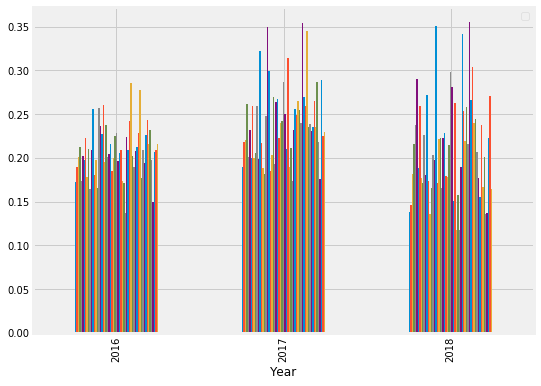

In [41]:
group_dest.unstack().plot.bar(figsize=(8,6))
plt.legend([])

#### By Day of the Week

In [42]:
group_daywk = aotp_nyc_new.groupby(['Year', 'DayOfWeek'])[['ArrDel15']].mean()
group_daywk.unstack()

ArrDel15                                                    \
DayOfWeek         1         2         3         4         5         6   
Year                                                                    
2016       0.213371  0.204212  0.183719  0.239971  0.245732  0.168510   
2017       0.246094  0.228868  0.214545  0.259176  0.285913  0.198944   
2018       0.173369  0.183764  0.190765  0.186212  0.277732  0.154729   

                     
DayOfWeek         7  
Year                 
2016       0.196368  
2017       0.200860  
2018       0.183383

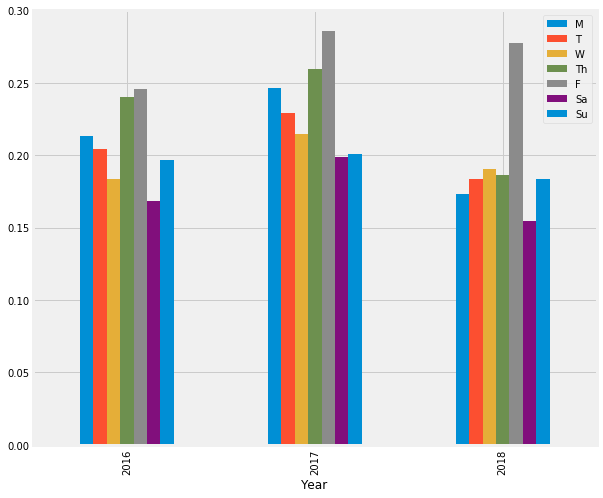

In [43]:
group_daywk.unstack().plot.bar(figsize=(9,8))
plt.legend(['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'])

#### By TIme of Year (Quarter)

In [44]:
group_qtr = aotp_nyc_new.groupby(['Year', 'Quarter'])[['ArrDel15']].mean()
group_qtr.unstack()

ArrDel15                              
Quarter         1         2         3         4
Year                                           
2016     0.196913  0.192093  0.244094  0.202412
2017     0.238976  0.280283  0.235135  0.186085
2018     0.194095       NaN       NaN       NaN

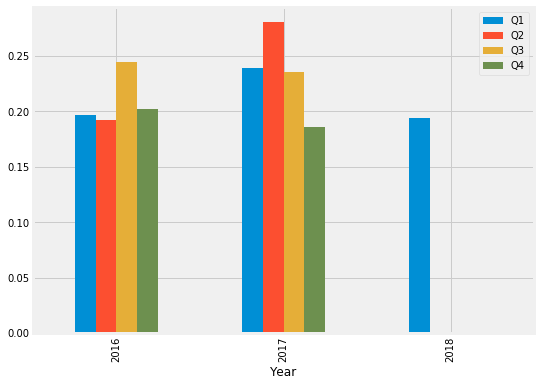

In [45]:
group_qtr.unstack().plot.bar(figsize=(8,6))
plt.legend(['Q1', 'Q2', 'Q3', 'Q4'])

#### By Time of Year (Month)

In [46]:
group_mo = aotp_nyc_new.groupby(['Year', 'Month'])[['ArrDel15']].mean()
group_mo.unstack()

ArrDel15                                                              \
Month        1         2         3         4         5         6         7    
Year                                                                          
2016   0.191129  0.215653  0.185216  0.149661  0.168951  0.256709  0.301259   
2017   0.247248  0.200437  0.264448  0.264348  0.281003  0.295280  0.272158   
2018   0.202268  0.191712  0.188455       NaN       NaN       NaN       NaN   

                                                         
Month        8         9         10        11        12  
Year                                                     
2016   0.248851  0.181254  0.177162  0.147254  0.283901  
2017   0.260403  0.167973  0.176587  0.142038  0.239808  
2018        NaN       NaN       NaN       NaN       NaN

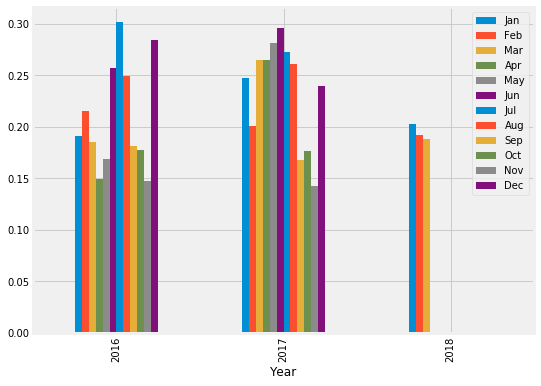

In [47]:
group_mo.unstack().plot.bar(figsize=(8,6))
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#### By Airline

In [48]:
group_carr = aotp_nyc_new.groupby(['Year', 'UniqueCarrier'])[['ArrDel15']].mean()
group_carr.unstack()

ArrDel15                                                    \
UniqueCarrier        AA        B6        DL        EV        UA        VX   
Year                                                                        
2016           0.209089  0.242209  0.178504  0.225088  0.212688  0.180406   
2017           0.210098  0.265788  0.199185  0.294008  0.227300  0.279744   
2018           0.160709  0.278040  0.137866  0.268596  0.169830  0.182877   

                         
UniqueCarrier        WN  
Year                     
2016           0.199477  
2017           0.244822  
2018           0.210436

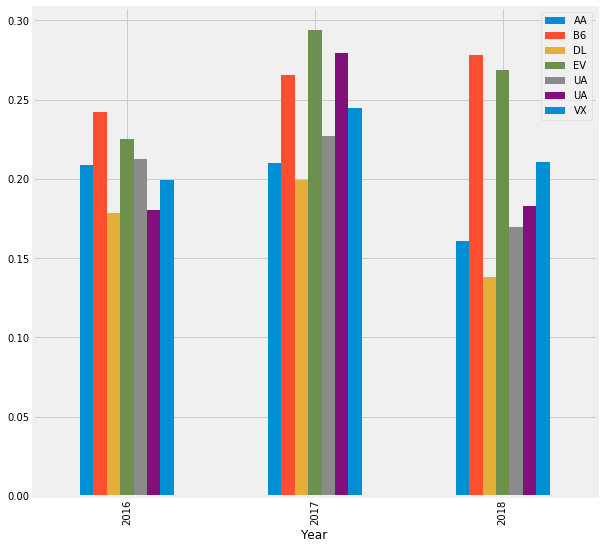

In [49]:
group_carr.unstack().plot.bar(figsize=(9,9))
plt.legend(['AA', 'B6', 'DL', 'EV', 'UA', 'UA', 'VX', 'WN'])

#### By Departure Time

#### 2016

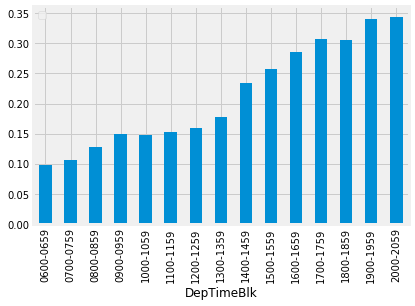

In [50]:
group_dep_16 = aotp_nyc_new[aotp_nyc_new['Year']==2016].groupby('DepTimeBlk')[['ArrDel15']].mean()
group_dep_16.plot.bar()
plt.legend([])

#### 2017

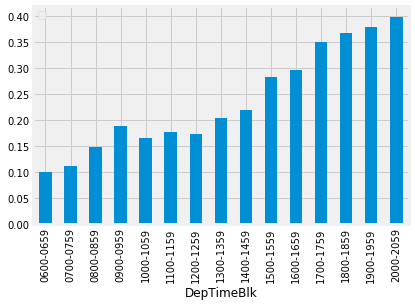

In [51]:
group_dep_17 = aotp_nyc_new[aotp_nyc_new['Year']==2017].groupby('DepTimeBlk')[['ArrDel15']].mean()
group_dep_17.plot.bar()
plt.legend([])

#### 2018

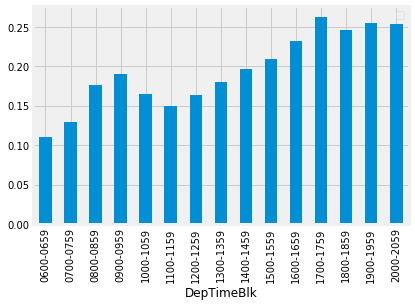

In [52]:
group_dep_18 = aotp_nyc_new[aotp_nyc_new['Year']==2018].groupby('DepTimeBlk')[['ArrDel15']].mean()
group_dep_18.plot.bar()
plt.legend([])

#### By arrival time

#### 2016

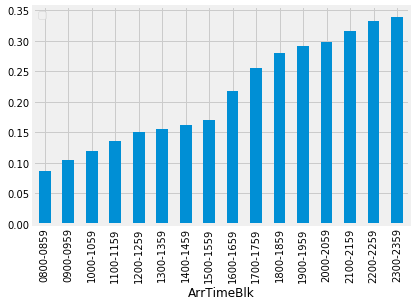

In [53]:
group_arr_16 = aotp_nyc_new[aotp_nyc_new['Year'] == 2016].groupby('ArrTimeBlk')[['ArrDel15']].mean()
group_arr_16.plot.bar()
plt.legend([])

#### 2017

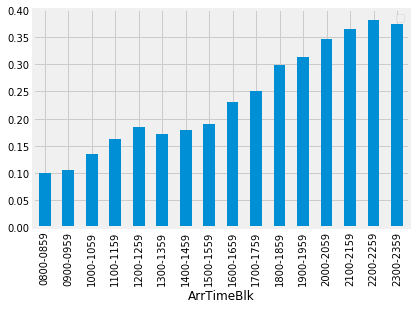

In [54]:
group_arr_17 = aotp_nyc_new[aotp_nyc_new['Year'] == 2017].groupby('ArrTimeBlk')[['ArrDel15']].mean()
group_arr_17.plot.bar()
plt.legend([])

#### 2018

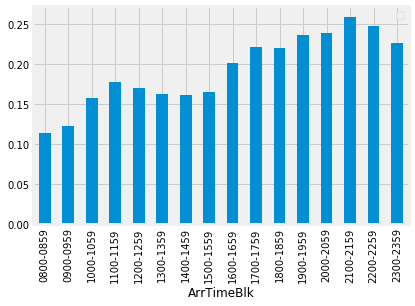

In [55]:
group_arr_18 = aotp_nyc_new[aotp_nyc_new['Year'] == 2018].groupby('ArrTimeBlk')[['ArrDel15']].mean()
group_arr_18.plot.bar()
plt.legend([])

#### By distance

In [56]:
group_dist = aotp_nyc_new.groupby(['Year', 'DistanceGroup'])[['ArrDel15']].mean()
group_dist.unstack()

ArrDel15                                                    \
DistanceGroup        1         2         3         4         5         6    
Year                                                                        
2016           0.223240  0.215927  0.199705  0.208640  0.220715  0.200183   
2017           0.269130  0.262282  0.225112  0.231907  0.225863  0.192672   
2018           0.225545  0.273362  0.185858  0.188219  0.186643  0.160776   

                                                                 
DistanceGroup        7         8         9         10        11  
Year                                                             
2016           0.182768  0.197487  0.186777  0.204196  0.231637  
2017           0.217675  0.218259  0.230448  0.237165  0.287129  
2018           0.165934  0.135957  0.196994  0.177081  0.201100

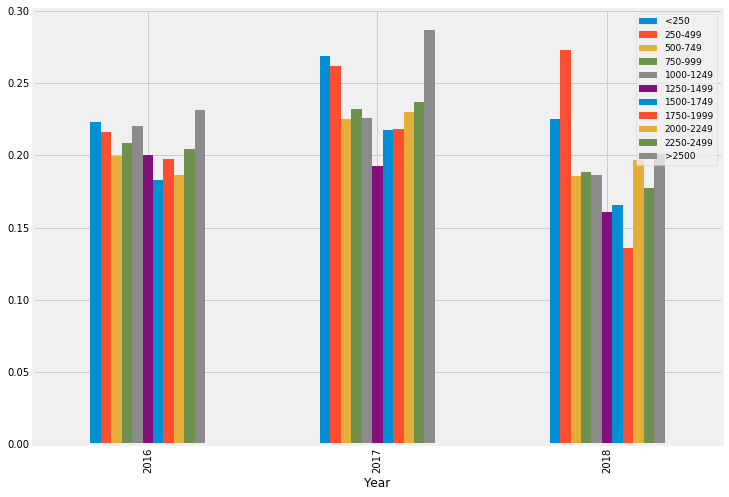

In [57]:
group_dist.unstack().plot.bar(figsize=(11,8))
plt.legend(['<250', '250-499', '500-749', '750-999', '1000-1249', '1250-1499', '1500-1749', '1750-1999', '2000-2249', '2250-2499', '>2500'], prop={'size': 9})

#### By flight time (time in air)

#### 2016

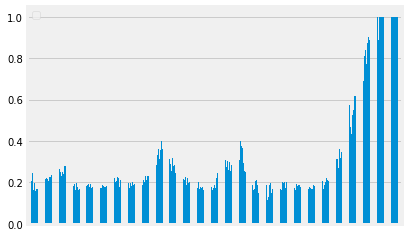

In [58]:
group_ftime16 = aotp_nyc_new[aotp_nyc_new['Year']==2016].groupby(['Year', 'AirTime'])[['ArrDel15']].mean()
group_ftime16.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

#### 2017

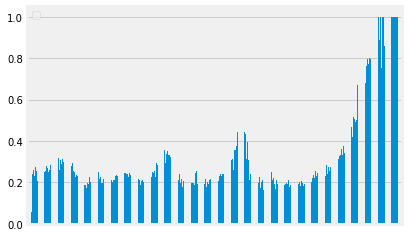

In [59]:
group_ftime17 = aotp_nyc_new[aotp_nyc_new['Year']==2017].groupby(['Year', 'AirTime'])[['ArrDel15']].mean()
group_ftime17.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

#### 2018

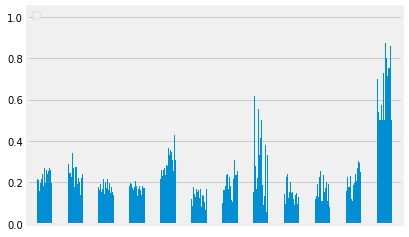

In [60]:
group_ftime18 = aotp_nyc_new[aotp_nyc_new['Year']==2018].groupby(['Year', 'AirTime'])[['ArrDel15']].mean()
group_ftime18.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

#### By flight time (total elapsed time)

#### 2016

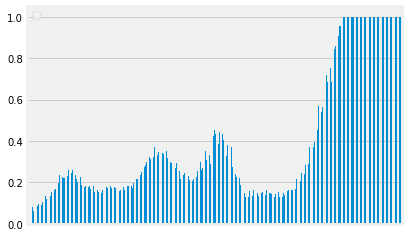

In [61]:
group_eltime16 = aotp_nyc_new[aotp_nyc_new['Year']==2016].groupby(['Year', 'ActualElapsedTime'])[['ArrDel15']].mean()
group_eltime16.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

#### 2017

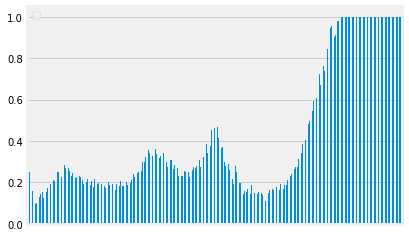

In [62]:
group_eltime17 = aotp_nyc_new[aotp_nyc_new['Year']==2017].groupby(['Year', 'ActualElapsedTime'])[['ArrDel15']].mean()
group_eltime17.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

#### 2018

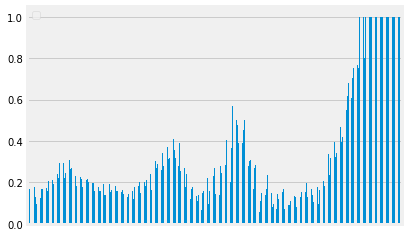

In [63]:
group_eltime18 = aotp_nyc_new[aotp_nyc_new['Year']==2018].groupby(['Year', 'ActualElapsedTime'])[['ArrDel15']].mean()
group_eltime18.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

#### By ground time

In [64]:
aotp_nyc_new['GroundTime'] = aotp_nyc_new['TaxiIn'] + aotp_nyc_new['TaxiOut']

In [65]:
aotp_nyc_new.groupby('Origin')[['GroundTime']].mean()

,GroundTime
Origin,
EWR,29.716753
JFK,35.158936
LGA,34.966919


#### 2016

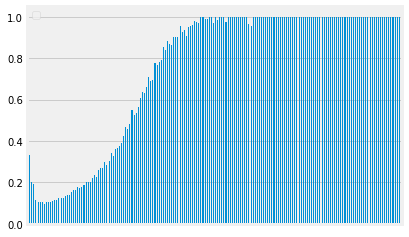

In [66]:
group_grdtime16 = aotp_nyc_new[aotp_nyc_new['Year']==2016].groupby(['Year', 'GroundTime'])[['ArrDel15']].mean()
group_grdtime16.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

#### 2017

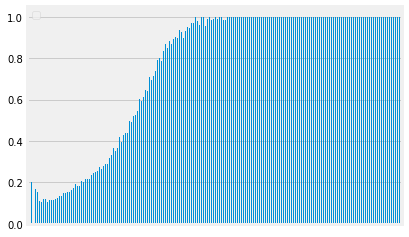

In [67]:
group_grdtime17 = aotp_nyc_new[aotp_nyc_new['Year']==2017].groupby(['Year', 'GroundTime'])[['ArrDel15']].mean()
group_grdtime17.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

#### 2018

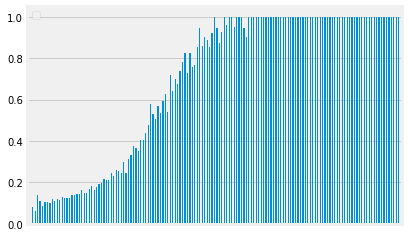

In [68]:
group_grdtime18 = aotp_nyc_new[aotp_nyc_new['Year']==2018].groupby(['Year', 'GroundTime'])[['ArrDel15']].mean()
group_grdtime18.plot.bar()
plt.xticks([])
plt.xlabel('')
plt.legend([])

### Get the scheduled volume for each hour of each year and the max scheduled volume for any hour for each year (at each airport)

The code below looks over the full data set for the number of scheduled departures and arrivals over every hour at each airport being considered for this project. After calculating the hourly scheduled volume (arrivals + departures) at each airport, find the maximum at that airport over any hour for a given year. This is a proxy for the maximum capacity of the airport* and we will ultimately take the percentage of each hourly scheduled volume at each airport in an attempt to measure how close to capacity the airport was at that hour.

*To be sure there are issues with this approach:

* One could simply take the maximum over the entire time covered in the data, since the value should not actually change from year to year (assuming no changes in airport infrastructure)
* There is potential for some leakage by normalizing over a given year when some of validation sets will split a year (maybe better to do over quarters or months)

Get all airports being evaluated and only get all the flights to/from these airports in *all* data for each year

In [69]:
airports = nyc_airports
airports.extend(dest_to_keep)

In [70]:
len(airports)

60

In [118]:
aotp_16_new = aotp_16[aotp_16['Origin'].isin(airports) | aotp_16['Dest'].isin(airports)]

In [119]:
aotp_17_new = aotp_17[aotp_17['Origin'].isin(airports) | aotp_17['Dest'].isin(airports)]

In [120]:
aotp_18_new = aotp_18[aotp_18['Origin'].isin(airports) | aotp_18['Dest'].isin(airports)]

In [121]:
aotp_16_new = aotp_16_new.reset_index()
aotp_17_new = aotp_17_new.reset_index()
aotp_18_new = aotp_18_new.reset_index()

Get the number of scheduled departures for each hour for each airport for each year.

In [122]:
dephr_16 = aotp_16_new.groupby(['FlightDate', 'DepTimeBlk', 'Origin']).count()[['index']].reset_index()

In [123]:
dephr_16.rename(columns={'index': 'DepHr', 'DepTimeBlk': 'TimeBlk', 'Origin': 'Airport'}, inplace=True)

In [124]:
dephr_16.head()

,FlightDate,TimeBlk,Airport,DepHr
0,2016-01-01,0001-0559,ACV,1
1,2016-01-01,0001-0559,ANC,7
2,2016-01-01,0001-0559,ATW,1
3,2016-01-01,0001-0559,AUS,2
4,2016-01-01,0001-0559,BFL,1


In [125]:
dephr_17 = aotp_17_new.groupby(['FlightDate', 'DepTimeBlk', 'Origin']).count()[['index']].reset_index()
dephr_17.rename(columns = {'index': 'DepHr', 'DepTimeBlk': 'TimeBlk', 'Origin': 'Airport'}, inplace=True)

In [126]:
dephr_18 = aotp_18_new.groupby(['FlightDate', 'DepTimeBlk', 'Origin']).count()[['index']].reset_index()
dephr_18.rename(columns = {'index': 'DepHr', 'DepTimeBlk': 'TimeBlk', 'Origin': 'Airport'}, inplace=True)

Now do the same for scheduled arrivals.

In [127]:
arrhr_16 = aotp_16_new.groupby(['FlightDate', 'ArrTimeBlk', 'Dest']).count()[['index']].reset_index()

In [128]:
arrhr_16.rename(columns={'index': 'ArrHr', 'ArrTimeBlk': 'TimeBlk', 'Dest': 'Airport'}, inplace=True)

In [129]:
arrhr_17 = aotp_17_new.groupby(['FlightDate', 'ArrTimeBlk', 'Dest']).count()[['index']].reset_index()

In [131]:
arrhr_17.rename(columns={'index': 'ArrHr', 'ArrTimeBlk': 'TimeBlk', 'Dest': 'Airport'}, inplace=True)

In [132]:
arrhr_18 = aotp_18_new.groupby(['FlightDate', 'ArrTimeBlk', 'Dest']).count()[['index']].reset_index()

In [133]:
arrhr_18.rename(columns={'index': 'ArrHr', 'ArrTimeBlk': 'TimeBlk', 'Dest': 'Airport'}, inplace=True)

In [1]:
# The following lines are likely redundant and should be removed.

In [136]:
dephr_16 = dephr_16[dephr_16['Airport'].isin(airports)]

In [137]:
dephr_17 = dephr_17[dephr_17['Airport'].isin(airports)]
dephr_18 = dephr_18[dephr_18['Airport'].isin(airports)]

In [138]:
arrhr_16 = arrhr_16[arrhr_16['Airport'].isin(airports)]
arrhr_17 = arrhr_17[arrhr_17['Airport'].isin(airports)]
arrhr_18 = arrhr_18[arrhr_18['Airport'].isin(airports)]

Combine the hourly scheduled departure and arrival data to get hourly scheduled volume at each airport.

In [145]:
volhr_16 = pd.merge(dephr_16, arrhr_16, how='outer')

In [147]:
volhr_17 = pd.merge(dephr_17, arrhr_17, how='outer')

In [148]:
volhr_18 = pd.merge(dephr_18, arrhr_18, how='outer')

In [149]:
volhr_16.fillna(0, inplace=True)

In [150]:
volhr_17.fillna(0, inplace=True)

In [151]:
volhr_18.fillna(0, inplace=True)

In [155]:
volhr_16['VolHr'] = volhr_16['DepHr'] + volhr_16['ArrHr']
volhr_17['VolHr'] = volhr_17['DepHr'] + volhr_17['ArrHr']
volhr_18['VolHr'] = volhr_18['DepHr'] + volhr_18['ArrHr']

Get the maximium hourly scheduled volume at each airport for each year and save all files with scheduled hourly volume data for each airport for each year.

In [163]:
maxvolhr16 = volhr_16.groupby(['Airport'])[['VolHr']].max().reset_index()
maxvolhr17 = volhr_17.groupby(['Airport'])[['VolHr']].max().reset_index()
maxvolhr18 = volhr_18.groupby(['Airport'])[['VolHr']].max().reset_index()

In [166]:
maxvolhr16.rename(columns={'VolHr': 'MaxVolHr'}, inplace=True)
maxvolhr17.rename(columns={'VolHr': 'MaxVolHr'}, inplace=True)
maxvolhr18.rename(columns={'VolHr': 'MaxVolHr'}, inplace=True)

In [168]:
volhr_16 = pd.merge(volhr_16, maxvolhr16, how='left')
volhr_17 = pd.merge(volhr_17, maxvolhr17, how='left')
volhr_18 = pd.merge(volhr_18, maxvolhr18, how='left')

In [169]:
with open('volhr_16.pkl', 'wb') as pickl1:
    pickle.dump(volhr_16, pickl1)

In [170]:
with open('volhr_17.pkl', 'wb') as pickl2:
    pickle.dump(volhr_17, pickl2)

In [171]:
with open('volhr_18.pkl', 'wb') as pickl3:
    pickle.dump(volhr_18, pickl3)